## Import libraries

In [1]:
import csv
from urllib.error import HTTPError, URLError
from urllib.request import urlopen
import pickle 
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
from nltk import tokenize
import importlib

from utils import pickle_load, pickle_dump 


In [9]:
df = pd.read_csv('data/comments/comments.csv')
df.shape

(7146, 11)

In [13]:
df = pd.read_csv('data/routes/routes-red-river-gorge-clean.csv')
df.shape

(200, 17)

In [15]:
df = pd.read_csv('data/ticks/ticks-clean.csv')
df.shape

(166584, 13)

In [88]:
df.iloc[20161].text

' &middot;  TR. Slipped halfway up, coming back for a send and a lead '

In [92]:
df[~df.comment.isna()]

Empty DataFrame
Columns: [Unnamed: 0, id, date, comment, style, leadStyle, pitches, text, createdAt, updatedAt, user_id, user_name, username_id]
Index: []

In [2]:
df = pd.read_csv('data/forum/general-climbing-final.csv')

In [7]:
df.shape

(2135, 9)

In [5]:
df.head(1)

post_id        date          username  \
0  105883054  2005-08-02  Richard Rossiter   

                                                body  num_likes     location  \
0  This post was originally a comment in Boulder ...          2  Boulder, CO   

     joined  points clubs              title  mean_word_length  \
0  Jul 2002       0   NaN  Dogs at the Crags          4.171779   

   mean_sent_length  word_count  polarity  subjectivity  
0             15.75         189 -0.073611      0.539583

In [22]:
base = "https://www.mountainproject.com/forum/103989405/general-climbing"
num_pages = 2

from scrape_forum import get_post_urls

forum_posts = get_post_urls(base, num_pages)
forum_posts

['https://www.mountainproject.com/forum/topic/125169949/why-does-mens-journal-even-try',
 'https://www.mountainproject.com/forum/topic/123913644/name-that-route-volume-viii',
 'https://www.mountainproject.com/forum/topic/124926580/new-and-experienced-climbers-over-50-26',
 'https://www.mountainproject.com/forum/topic/125178608/smith-rock-aac-narrow-miss',
 'https://www.mountainproject.com/forum/topic/125178552/death-on-mountaineers-route-on-whitney',
 'https://www.mountainproject.com/forum/topic/123740109/climbing-memes-60',
 'https://www.mountainproject.com/forum/topic/107347813/the-brotherhood-of-the-traveling-stopper',
 'https://www.mountainproject.com/forum/topic/125140211/puff-the-cat-historic-2nd-flat-iron-ascent-via-freeway',
 'https://www.mountainproject.com/forum/topic/125165886/if-you-tr-andor-dog-your-way-up-a-route-your-downgrade-suggestion-should-be-igno',
 'https://www.mountainproject.com/forum/topic/125168563/17',
 'https://www.mountainproject.com/forum/topic/123796595/b

### Concatenate temporary csv dump files

In [3]:
import scrape_forum


In [4]:
from scrape_forum import load_and_concatenate_temp_data


files = ['9953', '14474', '69658', '50549', '29338']
base = 'data/temp/general-climbing'
df = load_and_concatenate_temp_data(base, files)

/home/tybens/Desktop/Senior/NLP IW/climbing-analysis/scrape_forum.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[['days' in i for i in df.date.values]] = pd.to_numeric(days_ago.str[0]).apply(subtract_days_from_current)
/home/tybens/Desktop/Senior/NLP IW/climbing-analysis/scrape_forum.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[df.date.str.contains('hours')] = [datetime.date.today().strftime("%b %d, %Y") for _ in df.date[df.date.str.contains('hours')]]


In [6]:
df.to_csv('data/general-climbing.csv', index=False)

(360011, 13)

In [3]:
df = pd.read_csv('data/general-climbing-final.csv')

### Ethical Debates in Climbing

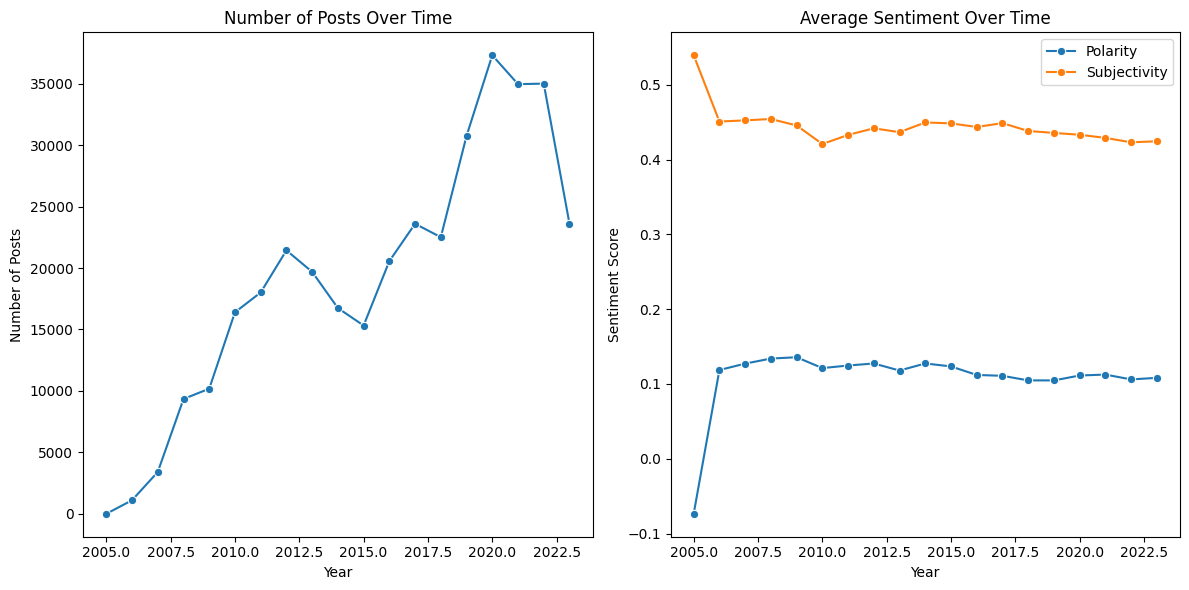

In [8]:
# Convert 'date' column to datetime for better analysis
df['date'] = pd.to_datetime(df['date'])

# Group data by year to analyze trends over time
data_by_year = df.groupby(df['date'].dt.year).agg({
    'post_id': 'count',
    'polarity': 'mean',
    'subjectivity': 'mean'
}).reset_index()

# Renaming columns for clarity
data_by_year.rename(columns={'post_id': 'num_posts', 'date': 'year'}, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Number of posts over time
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='num_posts', data=data_by_year, marker='o')
plt.title('Number of Posts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Posts')

# Average sentiment over time
plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='polarity', data=data_by_year, marker='o', label='Polarity')
sns.lineplot(x='year', y='subjectivity', data=data_by_year, marker='o', label='Subjectivity')
plt.title('Average Sentiment Over Time')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
df.columns

Index(['post_id', 'date', 'username', 'body', 'num_likes', 'location',
       'joined', 'points', 'clubs', 'title', 'mean_word_length',
       'mean_sent_length', 'word_count', 'polarity', 'subjectivity'],
      dtype='object')

### Descriptive Statistics on removed posts

In [4]:
df_removed_posts = df[df.num_likes.str.contains('removed').fillna(False)]

In [5]:
df_removed_posts.points.value_counts()

points
0    158
5     49
6     35
2     28
4     26
1     23
7     12
3     11
9      7
8      6
Name: count, dtype: int64

In [6]:
df_removed_posts.username.value_counts()

username
Kevin Worrall         12
FrankPS               10
Daniel Chode Rider     8
Tradiban               8
Will C                 8
                      ..
Josh Lipko             1
BigCountry             1
Grug M                 1
C H                    1
Paul Hunnicutt         1
Name: count, Length: 195, dtype: int64

In [33]:
df_kevin = df[df.username == 'Kevin Worrall']

In [53]:
df_kevin[df_kevin.body.str.contains('wimen')].body.values[0]

'C’mon Jim, wimen are no smarter than men overall, I’ve known women to do some really dumb things. Speaking of sewer lines, women put some really dumb stuff down the toilet and the garbage disposal.Men who say women are smarter have ulterior motives, or they’re just not that smart,It all depends on your definition of smart.'

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Using CountVectorizer with more features for LDA
vectorizer_lda = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
X_lda = vectorizer_lda.fit_transform(df_kevin['body'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_lda)

# Displaying topics
def display_topics(model, feature_names, n_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))
        print("\n")

display_topics(lda, vectorizer_lda.get_feature_names_out())

Topic 1:
climbing climbers traditional trad route climbs routes style sport climb


Topic 2:
climbing just climbers rock climb like rope don route ve


Topic 3:
climbing san diego sd good best pitches rock routes county


Topic 4:
climbing women men female gym know think male climbers just


Topic 5:
pitch like did just got good think route pitches line




Text(0.1, 0.5, 'Kevin Worrall')

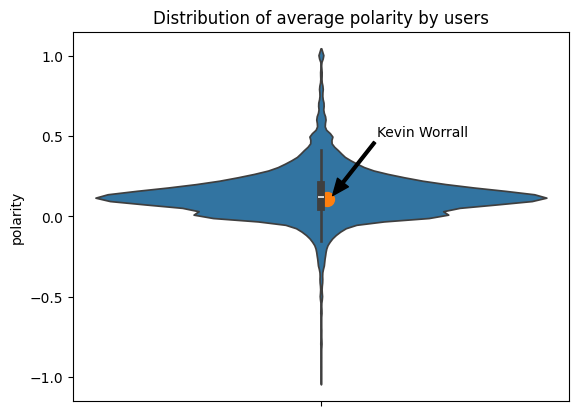

In [57]:
sns.violinplot(df.groupby('username').polarity.mean())
# add kevin worrall as a single point on the violinplot
plt.scatter(0.01, df_kevin.polarity.mean(), s=100)
plt.title('Distribution of average polarity by users')
# add a label to the point that points to the point diagonally from 0.
plt.annotate('Kevin Worrall', xy=(0.02, df_kevin.polarity.mean()+0.02), xytext=(0.1, 0.5), arrowprops=dict(facecolor='black', shrink=0.01, width=2, headwidth=10))

In [119]:
topic_distribution = lda.transform(X_lda)
df_kevin['dominant_topic'] = topic_distribution.argmax(axis=1) + 1

/tmp/ipykernel_80121/2855301181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kevin['dominant_topic'] = topic_distribution.argmax(axis=1) + 1


In [19]:
sample_posts = df_kevin.sample(10)  # Sample 10 random posts
for index, row in sample_posts.iterrows():
    print(f"Post:\n{row['body']}\n")
    print(row['post_id'])
    print(f"Dominant Topic: Topic {row['dominant_topic']}\n")
    print("="*50)


NameError: name 'df_kevin' is not defined

#### Kevin sentiment

In [18]:
df.body

0         This post was originally a comment in Boulder ...
1         I was recently having a discussion with some f...
2         There are no bad days of climbing.....Any day ...
3         Decko wrote:There are no bad days of climbing....
4         Marc Kajut just added the crag I learned to cl...
                                ...                        
359994    Ward Smith    wrote: I think the difficulty de...
359995    phylp phylp    wrote:Yay, Gabe! White Zombie F...
359996                                     Hospital corner?
359997                                             Venturi?
359998    I am following along on this conversation with...
Name: body, Length: 359999, dtype: object

In [34]:
(df.body.str.strip().str.len() == 0).sum()

0

In [5]:
df.body.apply(get_sentiment)

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [10]:
df.clubs.fillna('', inplace=True)   
df.title.fillna('', inplace=True)

In [13]:
df.dropna(axis=0, inplace=True)

In [16]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment

df['polarity'], df['subjectivity'] = zip(*df['body'].apply(get_sentiment))



In [22]:
df.username.value_counts()

1

In [5]:
numeric_cols = ['polarity', 'subjectivity', 'word_count', 'mean_word_length', 'mean_sent_length', 'points', 'num_likes']

In [20]:
df.groupby('username').subjectivity.mean().sort_values(ascending=False)

username
BrandonB Bagley      1.0
KeybytheThree        1.0
Steven VanSickle     1.0
MilesC               1.0
DynoDave             1.0
                    ... 
David Aldama         0.0
Derek West Newman    0.0
Stephen Smith        0.0
Luis Saca            0.0
Chip Shaw            0.0
Name: subjectivity, Length: 15804, dtype: float64

In [52]:
# pickle_dump(forum_post_urls, 'womens-post-urls')

### Visualizing Polarity

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/tybens/Desktop/Senior/NLP IW/climbing-analysis/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/tybens/Desktop/Senior/NLP IW/climbing-analysis/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/tybens/Desktop/Senior/NLP IW/climbing-analysis/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/tybens/Desktop/Senior/NLP IW/climbing-analysis/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/tybens/Desktop/Senior/NLP IW/climbing-analysis/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1513:

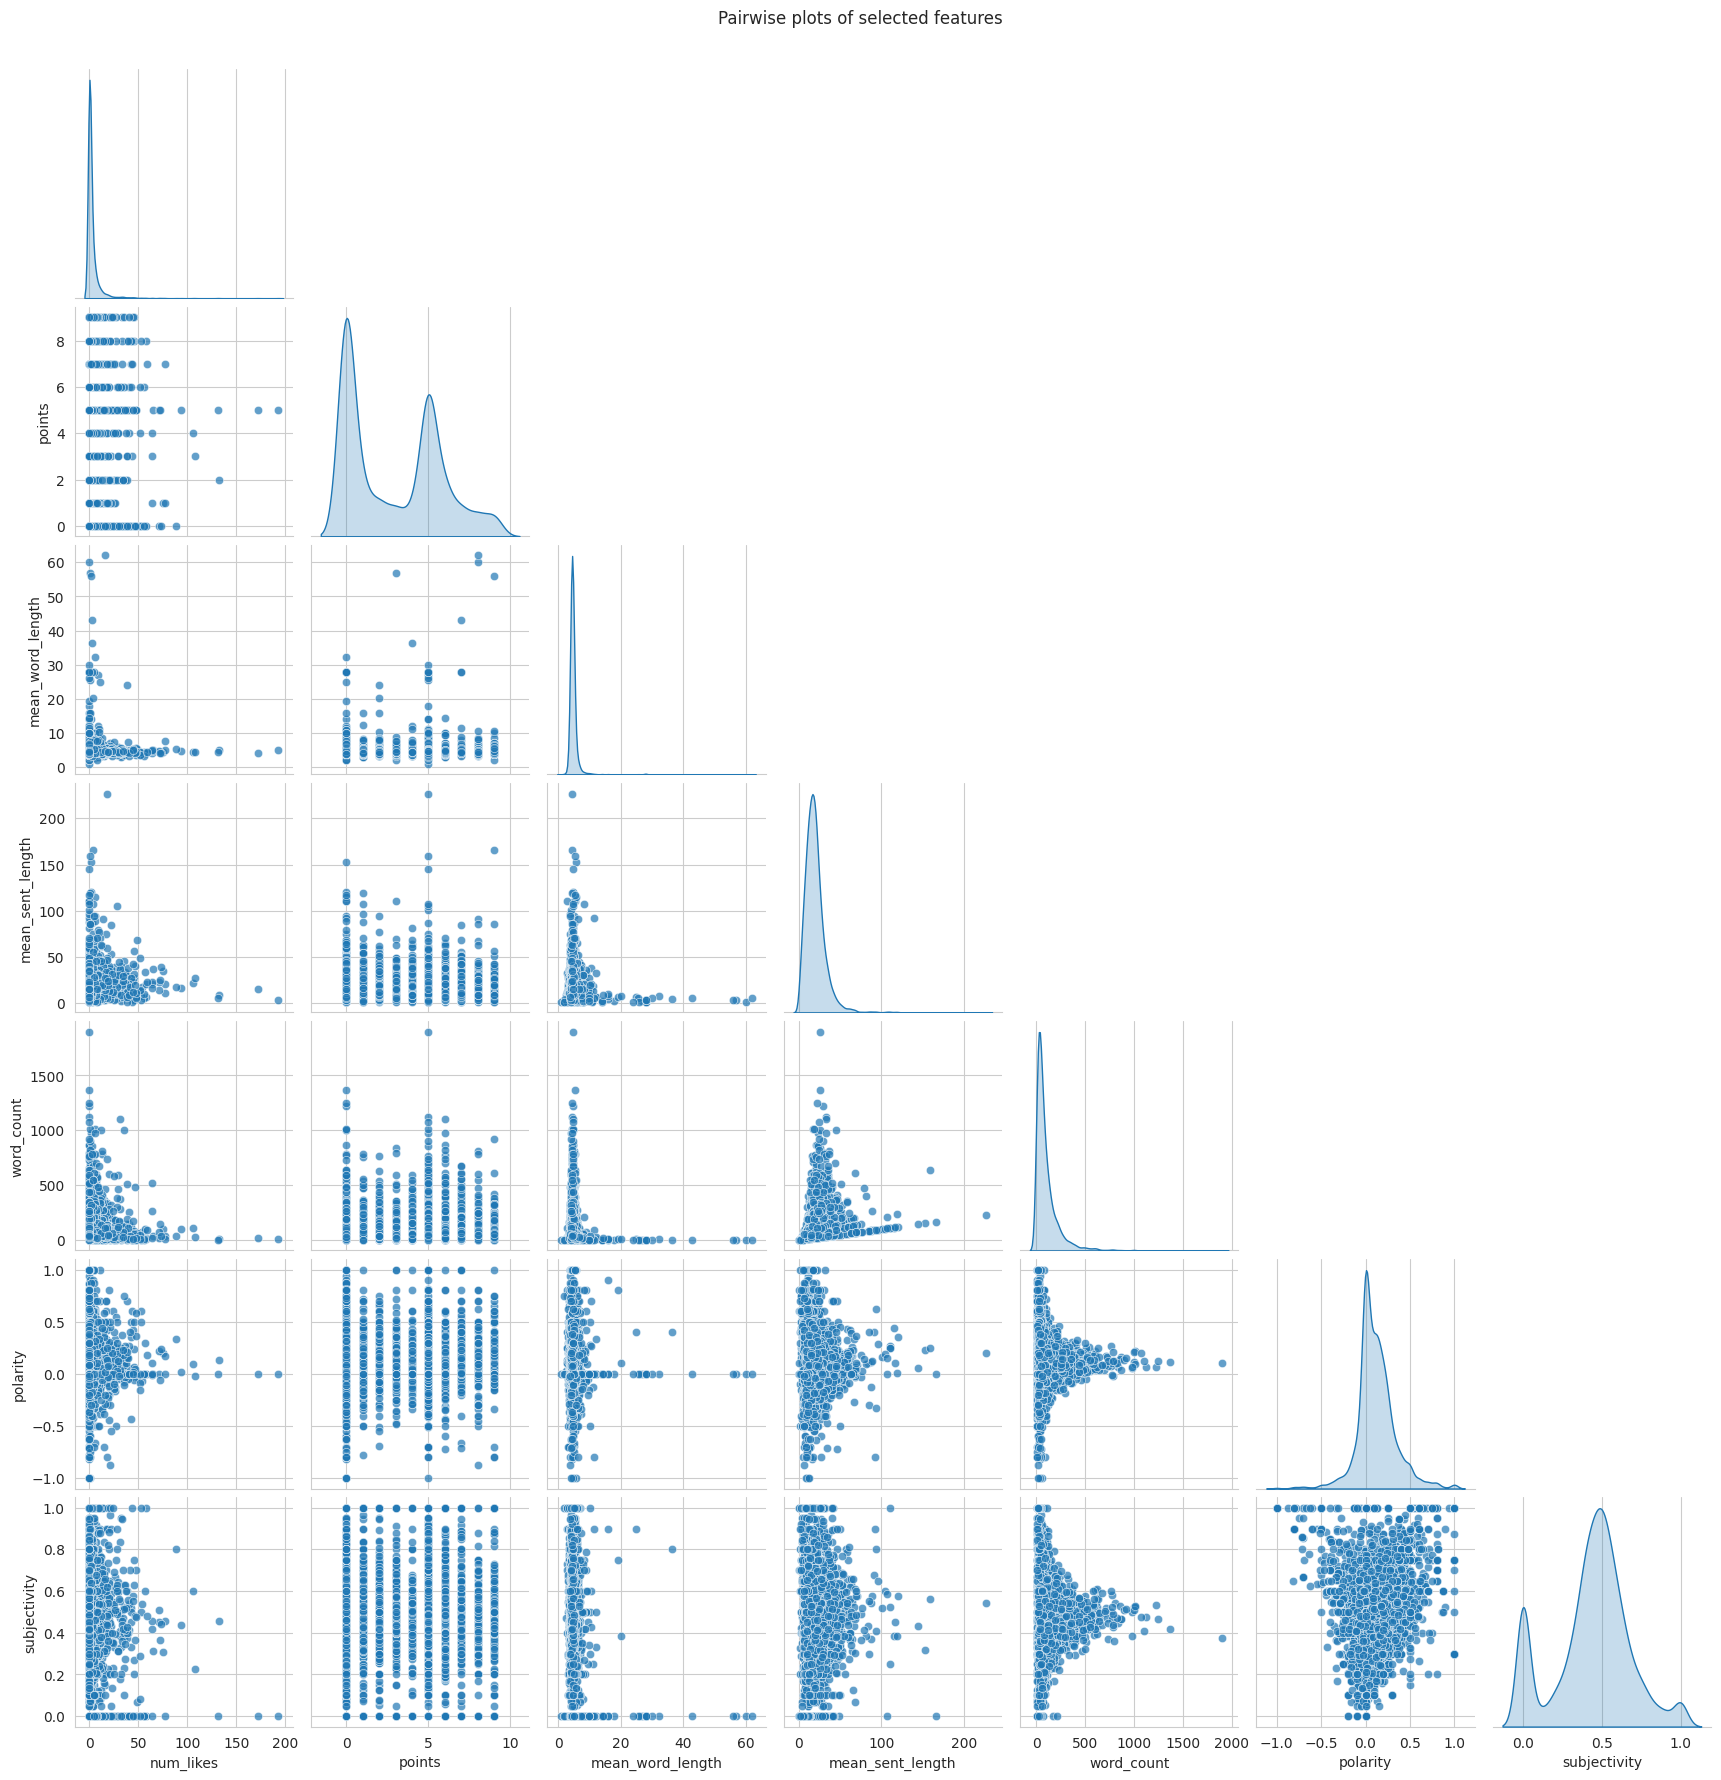

In [63]:
# 1. Sample the Data
sample_size = 5000
df_sample = df.sample(sample_size, random_state=42)

# 2. Customize Appearance
sns.set_style("whitegrid")  # This will give a nice background with grid

# Pairplot
sns.pairplot(df_sample[numeric_cols], diag_kind='kde', plot_kws={'alpha':0.7}, corner=True)
plt.suptitle('Pairwise plots of selected features', y=1.02)
plt.show()

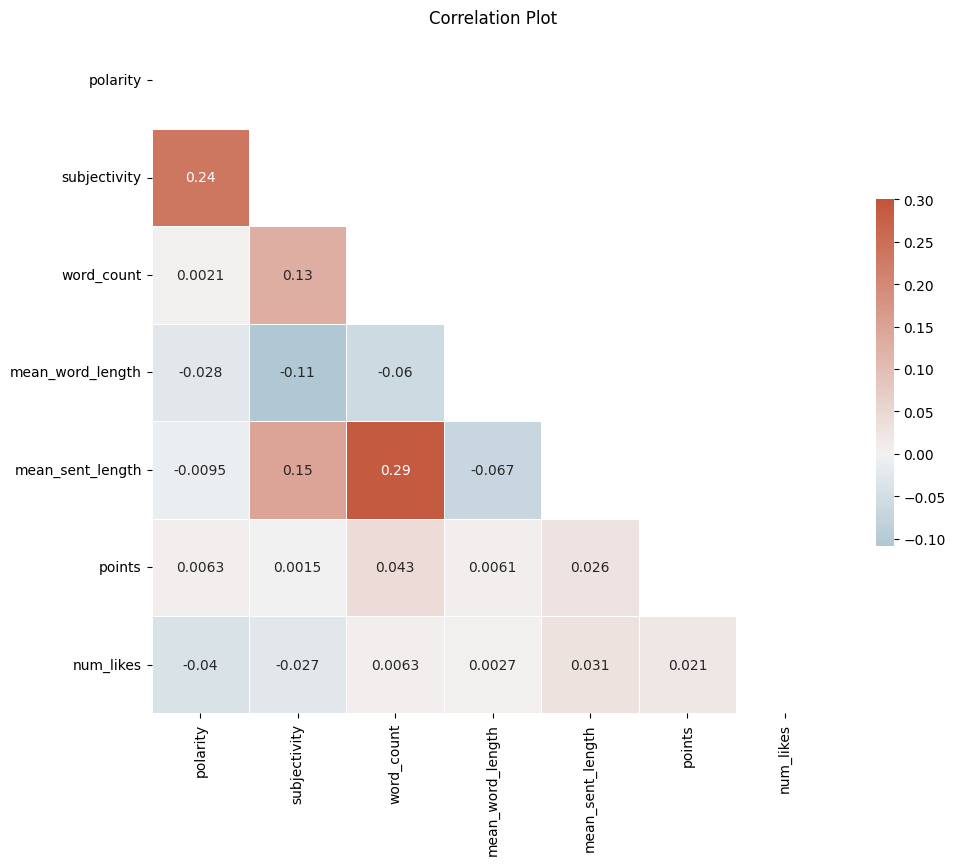

In [12]:
# Compute the correlation matrix
corr = df[numeric_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.title("Correlation Plot")
plt.show()

In [ ]:
# Compute average polarity and number of posts for each user
user_agg = df.groupby('username').agg({
    'polarity': 'mean',
    'post_id': 'size'
}).reset_index()
user_agg.rename(columns={'post_id': 'num_posts'}, inplace=True)

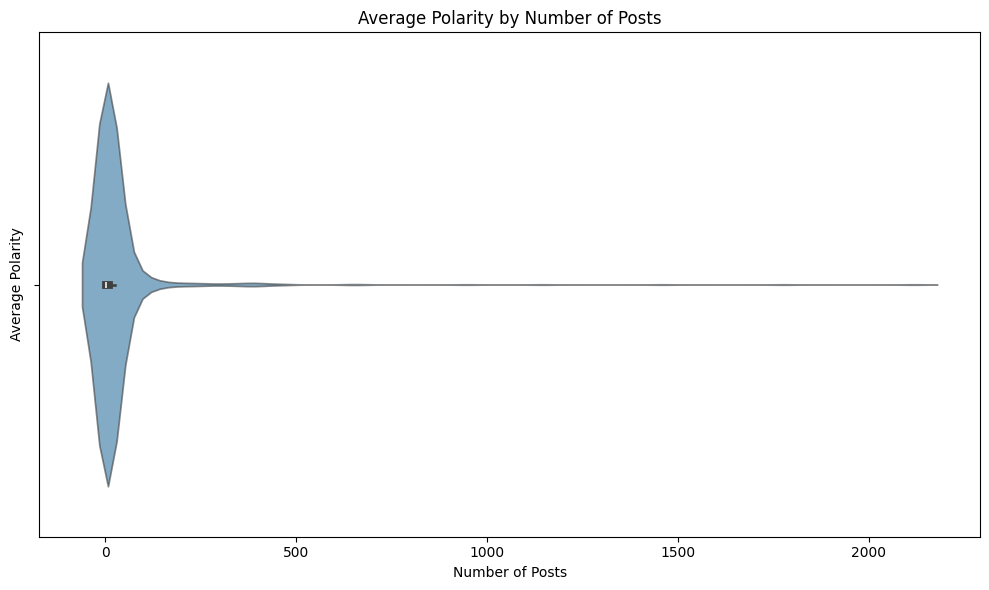

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot
N = 1000
top_users = user_agg.sample(N)

plt.figure(figsize=(10, 6))
sns.violinplot(x='num_posts', data=top_users, alpha=0.6)
plt.xlabel('Number of Posts')
plt.ylabel('Average Polarity')
plt.title('Average Polarity by Number of Posts')
plt.tight_layout()
plt.show()

### Debugging Forum Scrape

In [128]:
forum_post_urls = pickle_load('womens-post-urls')

In [81]:

page = urlopen(forum_posts[0]).read()
soup = BeautifulSoup(page)

In [8]:
from scrape_forum import get_messages_from_thread, get_data_from_message, clean_and_generate_df

data = []
for thread_url in forum_post_urls:
    messages, title = get_messages_from_thread(thread_url)
    new_data = []
    for message in messages:
        try:
            column = get_data_from_message(message)
            column.append(title)
            new_data.append(column)
        except Exception as e:
            print(e)
            pass
    data.extend(new_data)


COLUMNS = ['post_id', 'date', 'username', 'body', 'num_likes', 'location', 'joined', 'points', 'clubs','title']
df = clean_and_generate_df(data, COLUMNS)


In [3]:
df = pd.read_csv('data/womens-forum.csv')

## Exploratory Data Analysis

### Data cleaning

In [4]:
df.head()

post_id          date             username  \
0  114076020   Feb 9, 2018          Nick Wilder   
1  124962198  Sep 18, 2023            Zoe Stone   
2  124962198  Sep 27, 2023           Jenny Beck   
3  125010698  Sep 27, 2023           Jenny Beck   
4  125008673  Sep 26, 2023  Stephanie Robertson   

                                                body num_likes     location  \
0  This is a place for women to share experiences...        77  Boulder, CO   
1  I’m going to be driving from the northeast to ...         2   Narvik, NO   
2         Let me know if you’re coming through Moab!         1    West Penn   
3  Hey there! I would love to find some women cli...         1    West Penn   
4  I’ll be in Sedona area this weekend and would ...         0  Albuquerque   

     joined         points  mean_word_length  
0  Jan 2005  Points: 4,103          4.971831  
1  Sep 2016      Points: 0          4.116959  
2  Oct 2020      Points: 0          4.375000  
3  Oct 2020      Points: 0          4.327869  
4  Jun 2023      Points: 0          4.488889

In [5]:
# CLEANING STEPS MOVED TO CLEANING SCRIPT
# df.date[df.date.str.contains('hours')] = [datetime.date.today().strftime("%b %d, %Y") for _ in df.date[df.date.str.contains('hours')]]
# df.num_likes = df.num_likes.astype(int)
# df['points'] = df['points'].str[-1].astype(int)
# df.body = df.body.astype(str)

/tmp/ipykernel_374730/3656947867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[df.date.str.contains('hours')] = [datetime.date.today().strftime("%b %d, %Y") for _ in df.date[df.date.str.contains('hours')]]


In [42]:
# drop the "post removed" posts (TODO: DO ANALYSIS ON THESE)
df.drop(df[df.body.str.contains('removed')].index, inplace=True)   

### Distribution Statistics

In [36]:
import utils

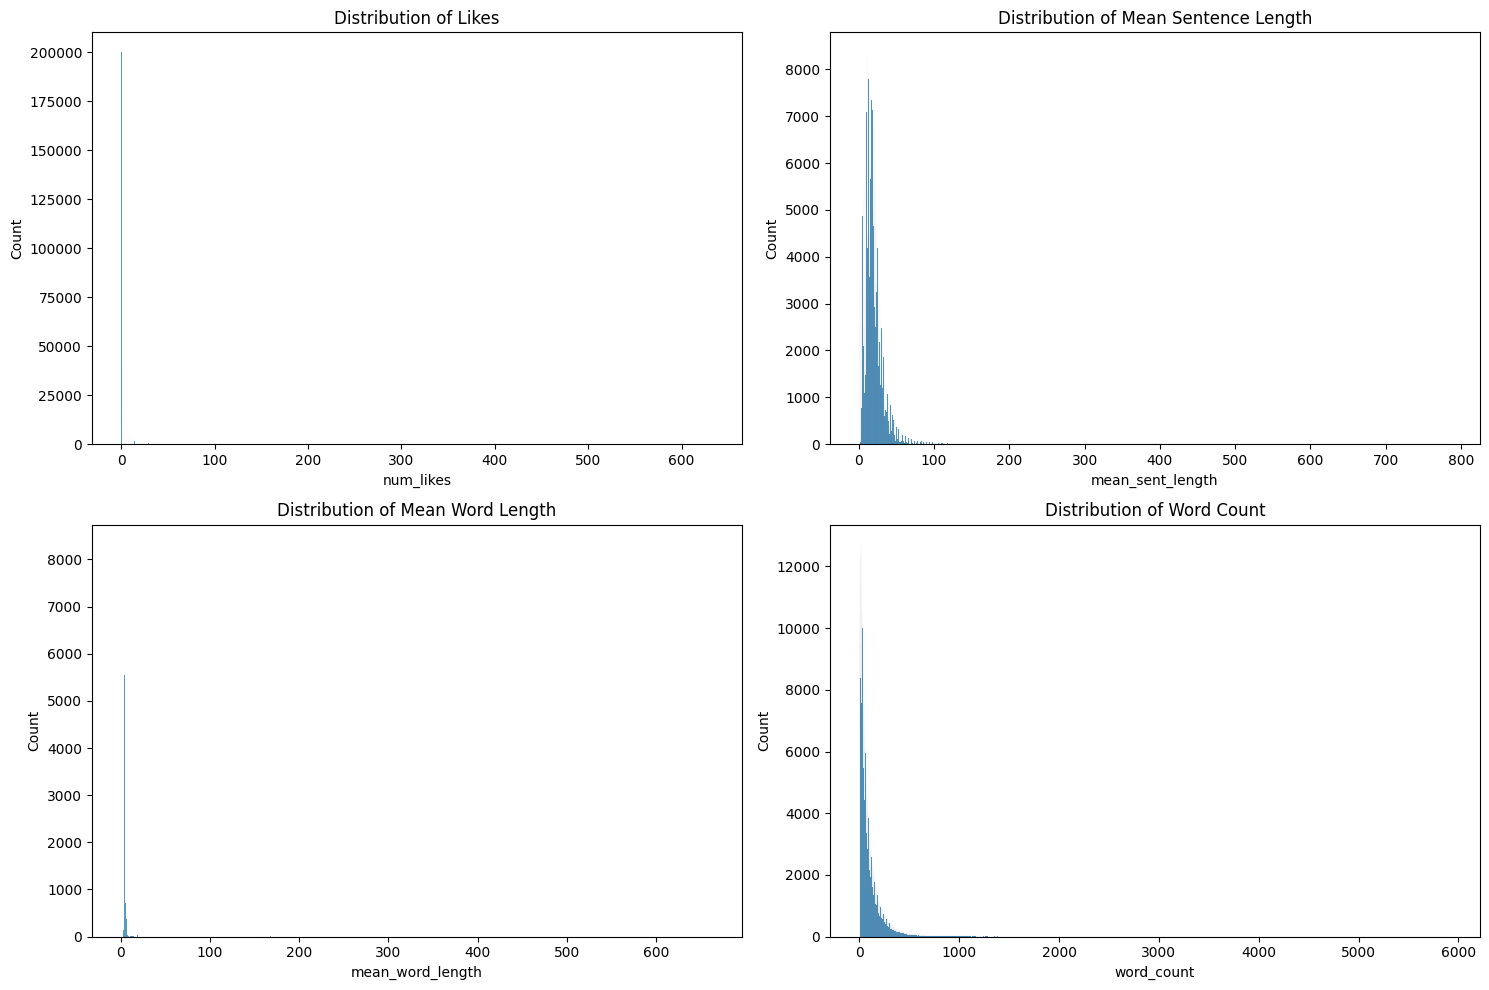

In [43]:
utils.descriptive_stats(df)

In [64]:
df.groupby(df['date'].dt.to_period("M"))['num_likes'].sum()

date
2005-08        2
2006-01       83
2006-02        8
2006-03       27
2006-04       40
           ...  
2023-06    17235
2023-07    16841
2023-08    16139
2023-09    14646
2023-10     6724
Freq: M, Name: num_likes, Length: 215, dtype: int64

### Time Series

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

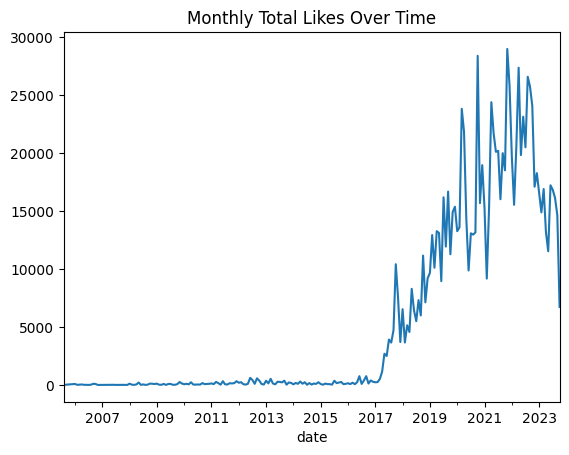

In [71]:
monthly_likes = df.groupby(df['date'].dt.to_period("M"))['num_likes'].sum()

monthly_likes.plot()
plt.title('Monthly Total Likes Over Time')
plt.show()

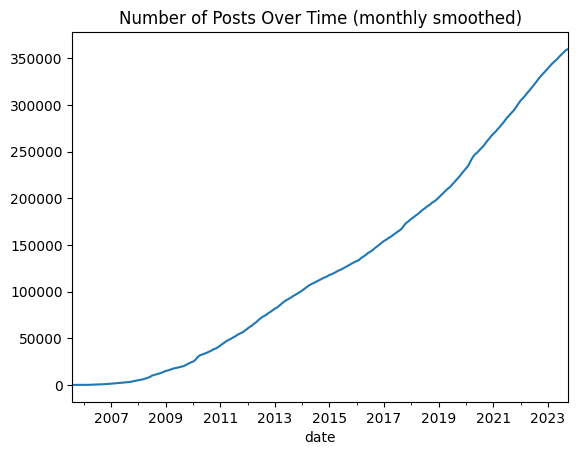

In [72]:
monthly_posts = df.groupby(df['date'].dt.to_period("M")).size()
monthly_posts.cumsum().plot()

plt.title('Number of Posts Over Time (monthly smoothed)')
plt.show()

In [82]:
top_locations

Index(['Unknown Hometown', 'OH', 'Boulder, CO', 'Boise, ID', 'Belgrade, MT',
       'Denver, CO', 'Upland', 'Portland, OR', 'Atascadero, CA',
       'Salt Lake City, UT', 'Golden, CO', 'Las Vegas, NV', 'Colorado',
       'Albuquerque, NM', 'Bishop, CA'],
      dtype='object', name='location')

### Categorical Analysis

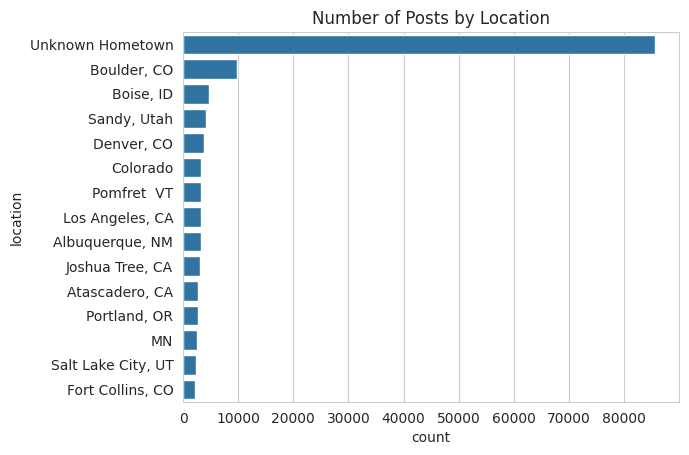

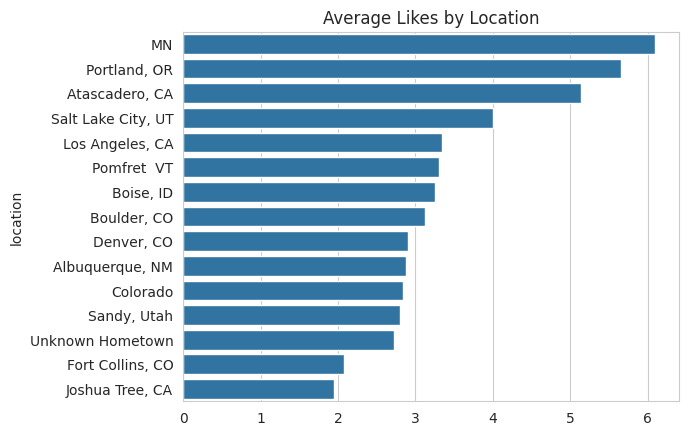

In [64]:
# Number of posts by location
col = 'location'
num = 15


top = df[col].value_counts().index[:num]
sns.countplot(y=df.loc[df.location.isin(top)].location, order=top)
plt.title('Number of Posts by Location')
plt.show()


# Average likes by location
top_locations = df[col].value_counts().head(num).index.tolist()
filtered_data = df[df[col].isin(top_locations)]
avg_likes = filtered_data.groupby(col)['num_likes'].mean()
sns.barplot(y=avg_likes.index, x=avg_likes.values, order=avg_likes.sort_values(ascending=False).index)
plt.title('Average Likes by Location')
plt.show()

### Textual Analysis

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['body'])
top_words = vectorizer.get_feature_names_out()

print("Top 10 words:", top_words)

Top 10 words: ['climb' 'climbing' 'don' 'good' 'just' 'like' 'people' 'think' 'time'
 'wrote']


In [32]:
df.subjectivity.mean()

0.4361181316148348

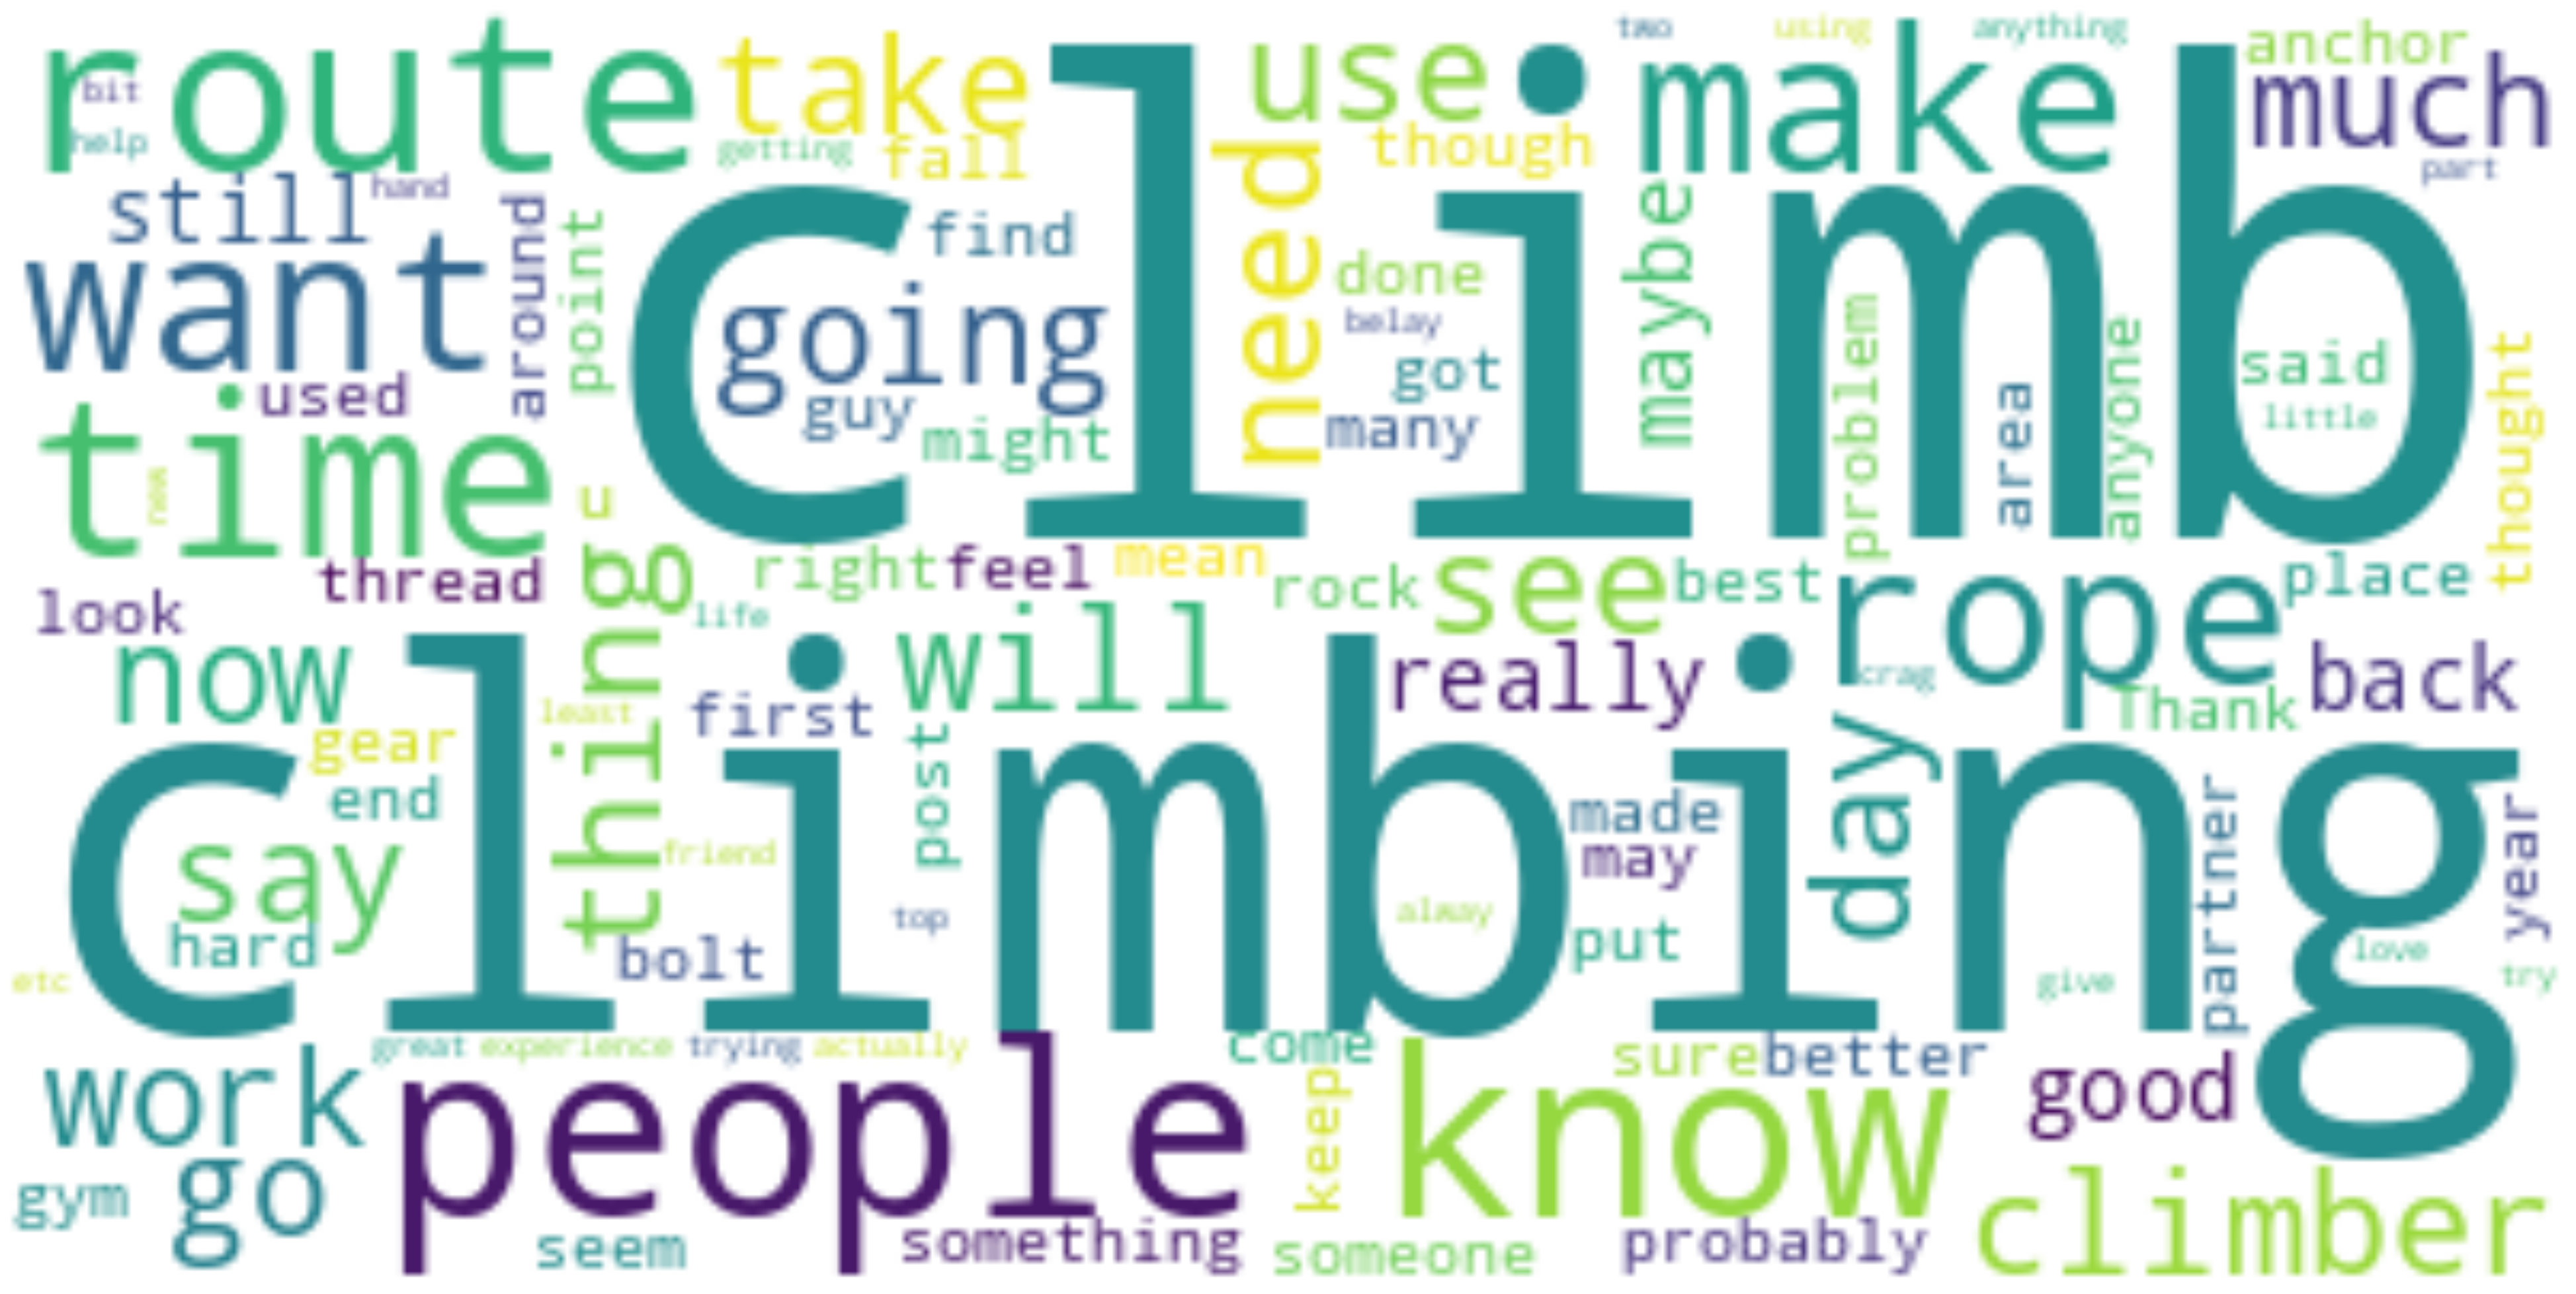

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from wordcloud import STOPWORDS

additional_stopwords = set(["m", "one", 'think', "lot", "well", "way", "even", "s"])  # Replace with any other words you deem as stop words
all_stopwords = STOPWORDS.union(additional_stopwords)

wordcloud = WordCloud(stopwords=all_stopwords, max_words=100, background_color="white").generate(" ".join(df['body']))

plt.figure(figsize=(50, 40))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


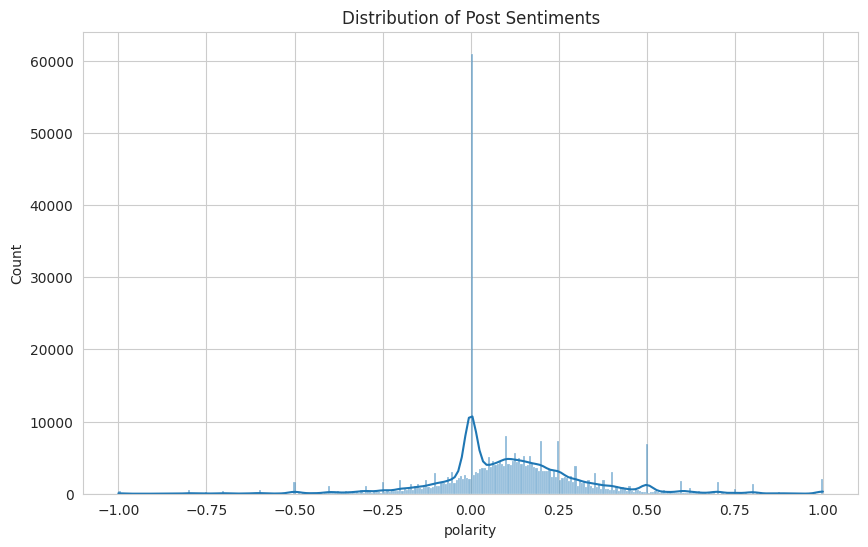

In [65]:
# Distribution of sentiment
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], kde=True)
plt.title('Distribution of Post Sentiments')
plt.show()

In [89]:
print(TextBlob("I'm the best Climber in the world.").sentiment)

Sentiment(polarity=1.0, subjectivity=0.3)


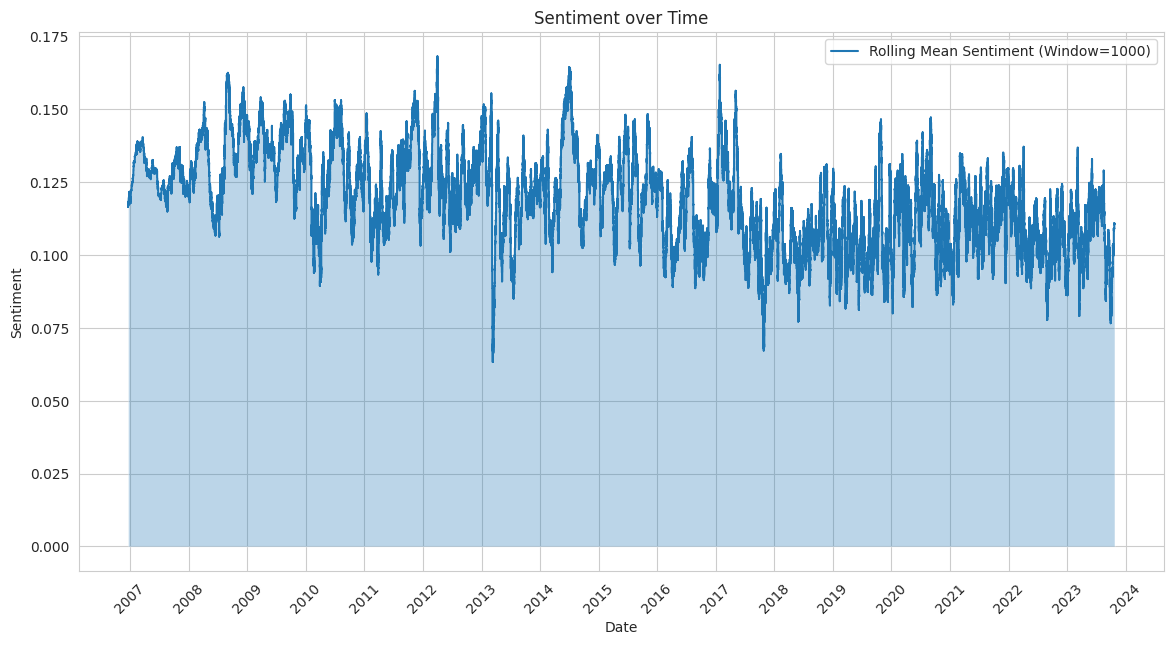

In [114]:
import matplotlib.dates as mdates 

df = df.sort_values(by='date')
window_size = 1000

roll = df['polarity'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['date'], roll, label=f'Rolling Mean Sentiment (Window={window_size})')
plt.fill_between(df['date'], roll, alpha=0.3)
plt.title('Sentiment over Time')
plt.xlabel('Date')
ax = plt.gca()  # get current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # set ticks to be every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format the tick labels to show abbreviated month and year
plt.xticks(rotation=45)
plt.ylabel('Sentiment')
plt.legend()
# plt.grid(True, which="both", ls="--", c='0.65')
# plt.tight_layout()
plt.show()

In [14]:
df.dtypes

post_id               int64
date                 object
username             object
body                 object
num_likes             int64
location             object
joined               object
points                int64
clubs                object
title                object
mean_word_length    float64
mean_sent_length    float64
word_count            int64
polarity            float64
subjectivity        float64
dtype: object

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

# Using CountVectorizer with more features for LDA
vectorizer_lda = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
X_lda = vectorizer_lda.fit_transform(df['body'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_lda)

# Displaying topics
def display_topics(model, feature_names, n_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))
        print("\n")

display_topics(lda, vectorizer_lda.get_feature_names_out())

Topic 1:
rope belay use anchor just wrote device knot ropes using


Topic 2:
climbing just time good like com wrote day ve years


Topic 3:
route routes climbing climb rock sport just wrote like bolts


Topic 4:
wrote people just don like think climbing know thread really


Topic 5:
climbing climb gym climber just fall climbers don hard wrote




In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(df['body'])

lda_tfidf = LatentDirichletAllocation(n_components=5, random_state=42)
lda_tfidf.fit(tfidf)

display_topics(lda_tfidf, tfidf_vectorizer.get_feature_names_out())

Topic 1:
climbing just women don like people think climb time wrote


Topic 2:
looking climbing climb love hi trad sport hey partner area


Topic 3:
com https wrote www forum cold bag helmet la jacket


Topic 4:
sent misty moving available bishop cadillac checking thanks mountain message


Topic 5:
pants harness size fit loops gear like good waist women




### Comparing Sentiment with Topic

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer_lda = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
X_lda = vectorizer_lda.fit_transform(df['body'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output = lda.fit_transform(X_lda)


In [125]:
topic_map = ['general', 'partner_search', 'gear_recommendation', 'free_gear', 'sizing_recommendation']

In [126]:
df['dominant_topic'] = [topic_map[i] for i in lda_output.argmax(axis=1)]

In [118]:
df['sentiment'] = df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [127]:
average_sentiments = df.groupby('dominant_topic')['sentiment'].mean()

In [128]:
df.dominant_topic.value_counts()

dominant_topic
general                  671
partner_search           564
sizing_recommendation    431
gear_recommendation      294
free_gear                166
Name: count, dtype: int64

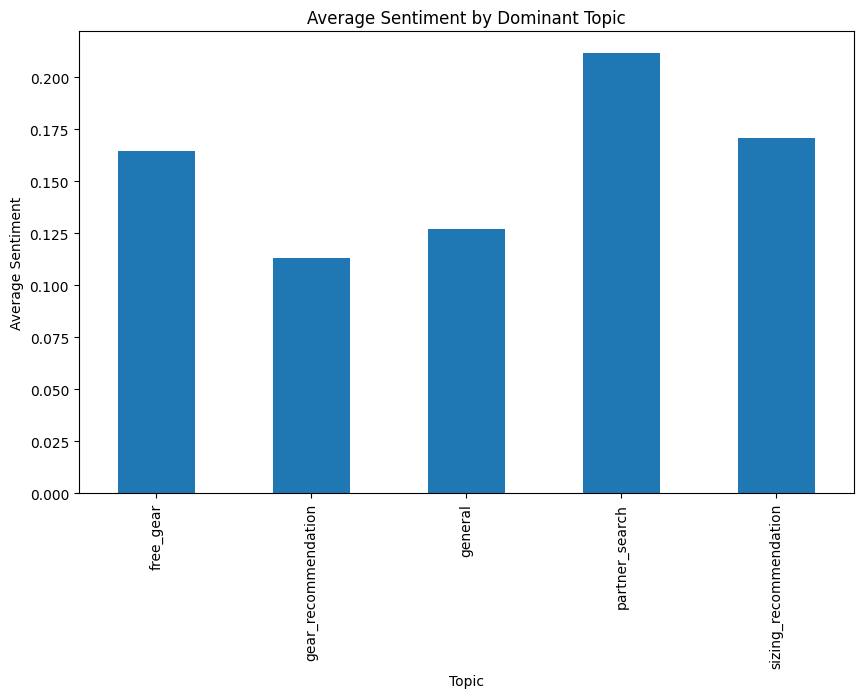

In [129]:
average_sentiments.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sentiment by Dominant Topic')
plt.ylabel('Average Sentiment')
plt.xlabel('Topic')
plt.show()

In [147]:
df.columns

Index(['post_id', 'date', 'username', 'body', 'num_likes', 'location',
       'joined', 'points', 'mean_word_length', 'mean_sent_length',
       'word_count', 'sentiment', 'dominant_topic'],
      dtype='object')

## Chopping Routes / Sport Routes

In [2]:
df = pd.read_csv('data/forum/general-climbing-final.csv')

In [103]:
key_words = ['Rock climbing evolution', 'Climbing gear advancements', 'Climbing gym growth', 'Bouldering vs. sport climbing', 'Climbing community changes', 'Trad climbers on sport climbing', 'Traditional ethics', 'purism', 'Trad vs. sport', 'Climbing philosophy', 'Old-school climbing', 'Climbing conservation', 'Climbing tradition', 'Bolt chopping', 'retro-bolted', 'Bolt removal', 'chopping', 'chopped', 'Ethics of bolting', 'Climbing bolt controversy', 'Rock climbing preservation', 'Bolt wars', 'Climbing route alteration', 'Bolt debate', 'Anchor removal']

df_chop = df[df.body.str.contains('|'.join(key_words), case=False) | df.title.str.contains('|'.join(key_words), case=False)]


In [27]:
print(df_chop.iloc[53].body)

So then you don't see ACE and FCC as failures?    Perfect, you agree that this existing format (local climbing organizations & fixed hardware councils) are the solution to the problem.    Then why isn't it applied & working in other parts of the country (ie. Farley's Ledge, the New, &  Laurel Knob) where bolts have  been contentious in the past year?


## Analyzing chipping over time

In [76]:
df = pd.read_csv('data/forum/general-climbing-final.csv')

In [77]:
key_words = ['chip', 'chipping', 'chipped', 'drill', 'rock modification', 'manufactured hold', 'artificial hold', 'rock alteration', 'glued holds', 'gluing']
df_chip = df[df.body.str.contains('|'.join(key_words), case=False) | df.title.str.contains('|'.join(key_words), case=False)]




In [78]:
df_chip.date = pd.to_datetime(df_chip.date)
df.date = pd.to_datetime(df.date)

/tmp/ipykernel_183257/1540625333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chip.date = pd.to_datetime(df_chip.date)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


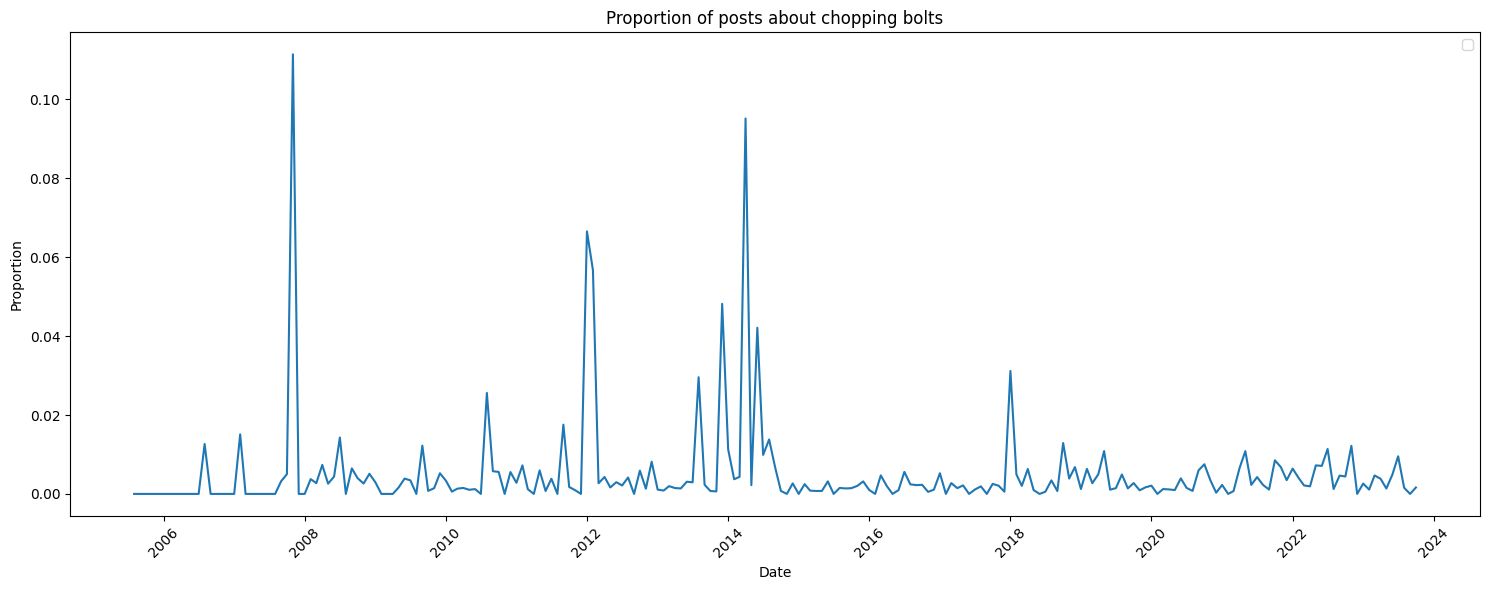

In [118]:
# Group by year and month, and count the number of posts
monthly_posts = df.groupby([df['date'].dt.year, df['date'].dt.month]).size()
# Create a new DataFrame for plotting
monthly_posts_df = monthly_posts.rename_axis(['Year', 'Month']).reset_index(name='Posts')
# Create a datetime index for plotting
monthly_posts_df['DateTime'] = pd.to_datetime(monthly_posts_df[['Year', 'Month']].assign(DAY=1))

# Group by year and month, and count the number of 'chip' posts
monthly_chip_posts = df_chip.groupby([df_chip['date'].dt.year, df_chip['date'].dt.month]).size()

# Create a DataFrame for 'chip' posts
monthly_chip_posts_df = monthly_chip_posts.rename_axis(['Year', 'Month']).reset_index(name='ChipPosts')

# Create a datetime index for plotting
monthly_chip_posts_df['DateTime'] = pd.to_datetime(monthly_chip_posts_df[['Year', 'Month']].assign(DAY=1))

# Merge with the total posts DataFrame
merged_df = pd.merge(monthly_posts_df, monthly_chip_posts_df, on='DateTime', how='left').fillna(0)

# Calculate the proportion of 'chip' posts
merged_df['ChipPostProportion'] = merged_df['ChipPosts'] / merged_df['Posts']

# Plotting
plt.figure(figsize=(15, 6))

# Plot total posts
# sns.lineplot(x='DateTime', y='Posts', data=merged_df, label='Total Posts')

# Plot proportion of 'chip' posts
sns.lineplot(x='DateTime', y='ChipPostProportion', data=merged_df)

plt.title('Proportion of posts about chopping bolts')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [126]:
df_chip.date.dt.year.value_counts()

date
2012    295
2014    294
2022    181
2018    151
2021    146
2013    140
2019    100
2020     86
2007     80
2023     77
2011     66
2010     64
2008     51
2017     42
2016     41
2009     24
2015     21
2006      1
Name: count, dtype: int64

In [129]:
df_chip[df_chip.date.dt.year == 2014].iloc[12].body

"Warbonnet wrote:   The answer is easier than most are making it to be: if the FA party did the route in a certain style and ran out 100 before a bolt was placed, that means only one thing:  someone showed that it can be done and you or someone else can't head trip it that far, that either don't do it or work up to it.  We have legendary such climbs where I live, put up by equal legends in hob nail boots no less.  Most can't do them in today's best climbing shoes.  So, those routes are held in awe and are somewhat mythical, having taken on their own kharma.  They can be repeated but there should always be those kind of routes left as the FA-ers found them.   Climb them as is or hands & feet off).  (PS:  If our huge climbing community found these particular routes with new bolts on them, it wouldn't take long until we found out who did it.  They would be paid a visit and the bolts chopped.   These routes should retain their own mythdom,,,,,they've been repeated but by a select few and t

In [106]:
df_chip[df_chip.title =='Chipping Ethics'].polarity.mean()

0.09010288278804002

In [114]:
df_chip = df_chop

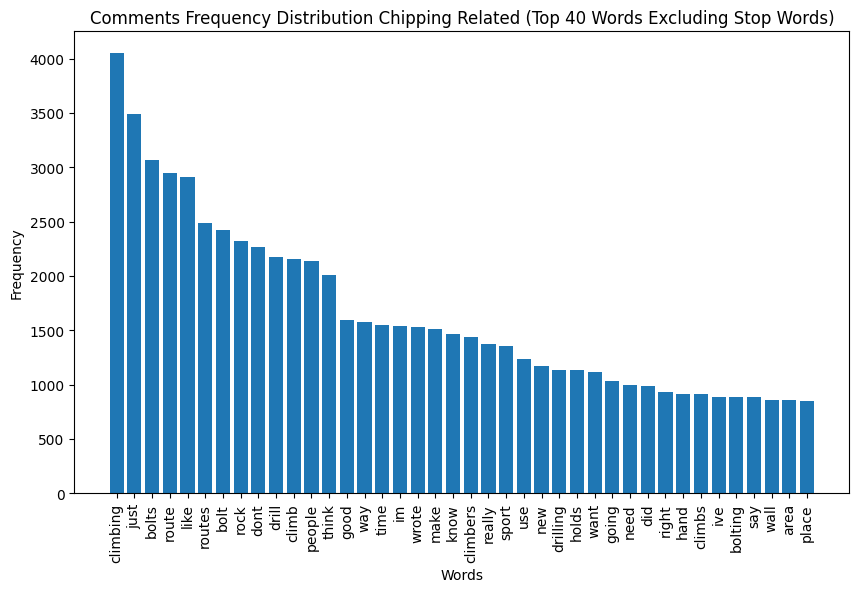

In [68]:
import utils
importlib.reload(utils)

top_n = 40
utils.word_freq_graph(' '.join(df_chip['body']), top_n, f'Comments Frequency Distribution Chipping Related (Top {top_n} Words Excluding Stop Words)')

### Comparing Sentiment between Chipping and General

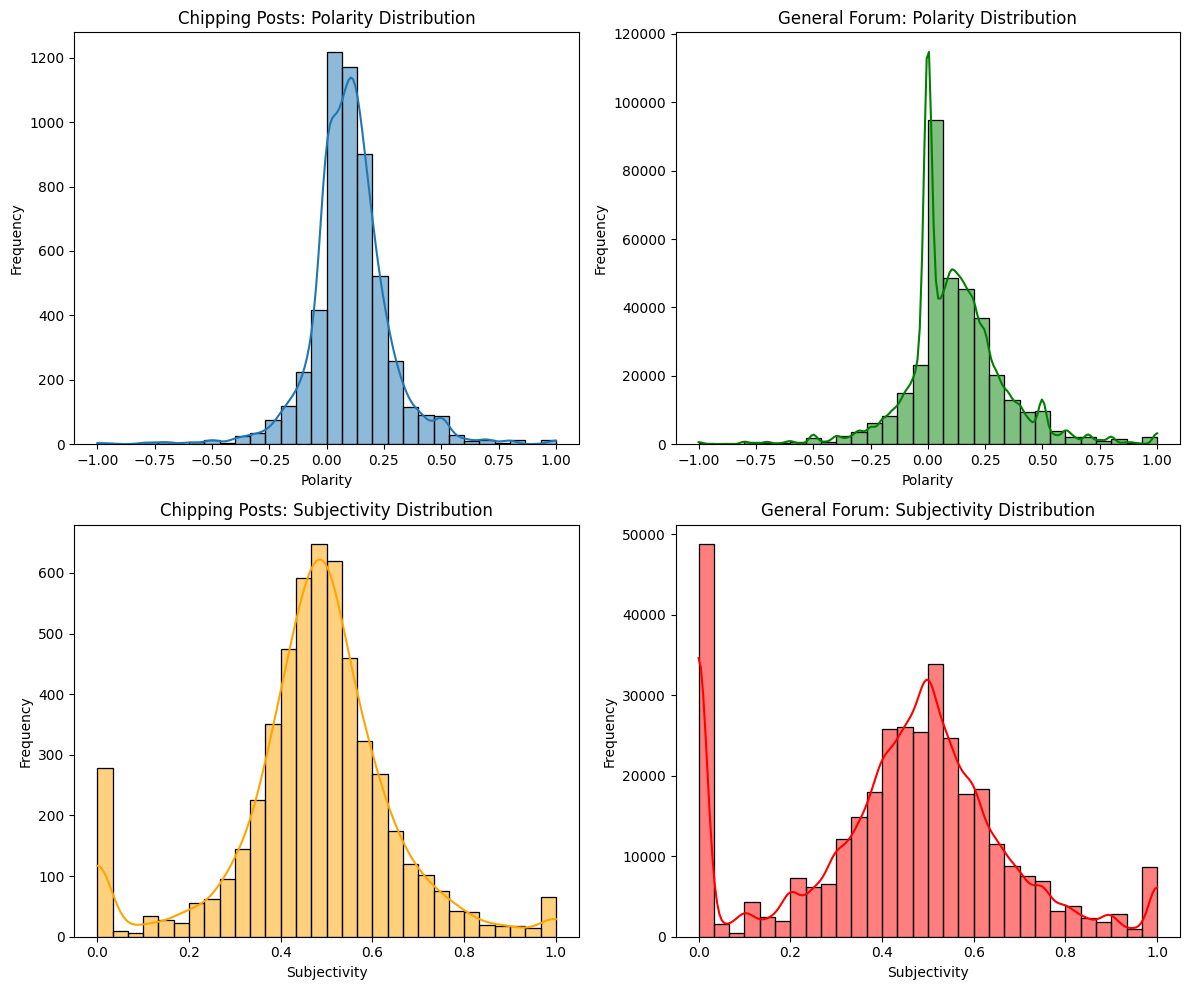

Average polarity and subjectivity for chipping dataset: 

Polarity:  0.10339877792842464
Subjectivity:  0.4724487403466545


Average polarity and subjectivity for general dataset: 

Polarity:  0.11510768493007764
Subjectivity:  0.4355663282161167


In [69]:
# Calculating average polarity and subjectivity for the sample general dataset
# make the general forum not include chipping posts
df_gen = df[~df.index.isin(df_chip.index)]
average_polarity_general = df_gen['polarity'].mean()
average_subjectivity_general = df_gen['subjectivity'].mean()
average_polarity_chip = df_chip['polarity'].mean()
average_subjectivity_chip = df_chip['subjectivity'].mean()

# Plotting the distribution of polarity and subjectivity for both datasets
plt.figure(figsize=(12, 10))

# Polarity distribution for climbing-specific dataset
plt.subplot(2, 2, 1)
sns.histplot(df_chip['polarity'], bins=30, kde=True)
plt.title('Chipping Posts: Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Polarity distribution for general dataset
plt.subplot(2, 2, 2)
sns.histplot(df_gen['polarity'], bins=30, kde=True, color='green')
plt.title('General Forum: Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subjectivity distribution for climbing-specific dataset
plt.subplot(2, 2, 3)
sns.histplot(df_chip['subjectivity'], bins=30, kde=True, color='orange')
plt.title('Chipping Posts: Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

# Subjectivity distribution for general dataset
plt.subplot(2, 2, 4)
sns.histplot(df_gen['subjectivity'], bins=30, kde=True, color='red')
plt.title('General Forum: Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# print the following stats
print('Average polarity and subjectivity for chipping dataset: \n')
print('Polarity: ', average_polarity_chip)
print('Subjectivity: ', average_subjectivity_chip)
print('\n')
print('Average polarity and subjectivity for general dataset: \n')
print('Polarity: ', average_polarity_general)
print('Subjectivity: ', average_subjectivity_general)

In [14]:
df_chip['date'] = pd.to_datetime(df_chip['date'])

/tmp/ipykernel_368728/3680877388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chip['date'] = pd.to_datetime(df_chip['date'])


In [119]:
monthly_sentiment = df_chip.resample('Y', on='date')['polarity'].mean()

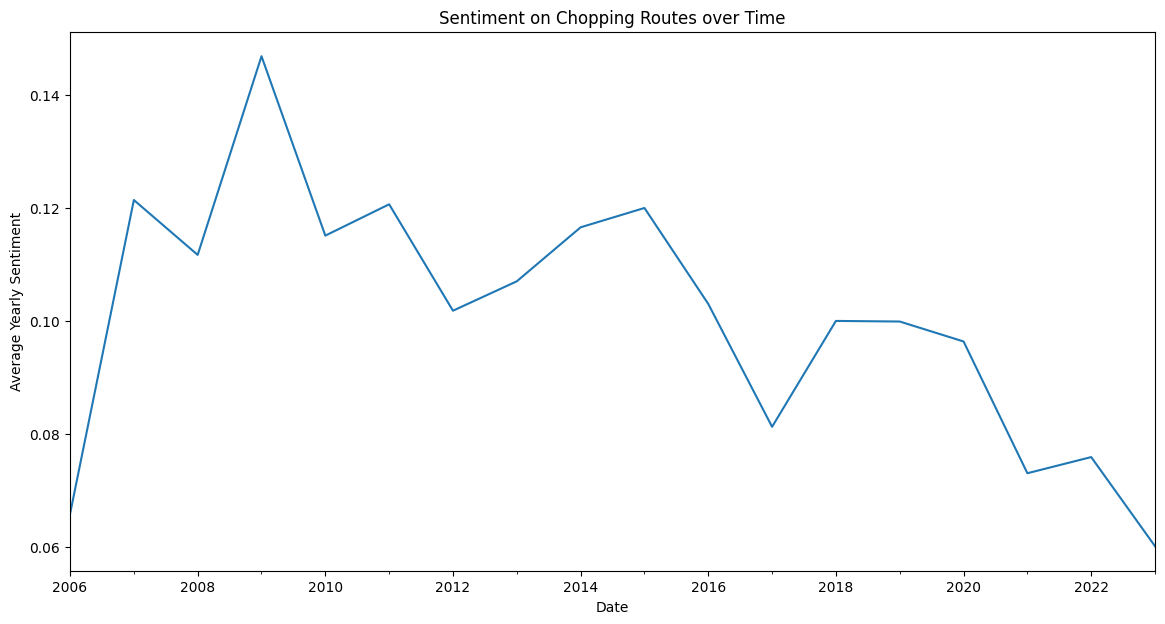

In [122]:
plt.figure(figsize=(14,7))
monthly_sentiment.plot()
plt.title('Sentiment on Chopping Routes over Time')
plt.plot(monthly_sentiment.index, monthly_sentiment, alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Average Yearly Sentiment')
plt.show()

In [123]:
df_chip

post_id       date        username  \
555     105851144 2006-08-20          Tony B   
1364    105917674 2007-02-10       Ian Wolfe   
1406    105919308 2007-02-13   James Beissel   
1410    105919308 2007-02-13    Jason Himick   
1449    105917674 2007-02-13  Wynn Viimeinen   
...           ...        ...             ...   
355147  124406868 2023-08-14      Lori Milas   
355157  124406868 2023-08-14          Jan Mc   
355773  124803547 2023-08-22   Kevin DeWeese   
359371  124730650 2023-10-08      Colin Rowe   
359783  124926580 2023-10-15          Jan Mc   

                                                     body  num_likes  \
555     At the risk of entering another debate, I'll p...          0   
1364    Bob:  not a fan of indie music I see...   I ad...          0   
1406    The bolts are now chopped and the route has al...          0   
1410    I already found your climb Tom and retro-bolte...          0   
1449    Hey Bob (and other older, wiser, more experien...          0   
...                                                   ...        ...   
355147  Jan Mc    wrote:Nice Phyl, Skip is looking goo...          1   
355157  Nice Phyl, Skip is looking good! Not sure the ...          6   
355773  John Clark    wrote: How can you possibly just...         17   
359371  Mark Pilate    wrote:To get definitively techn...          2   
359783  Go down to the nurseries in Palm Springs to fi...          1   

                        location    joined  points  \
555           Around Boulder, CO  Jan 2001       3   
1364            Fayetteville, NC  Jan 2006       5   
1406                 Boulder, CO  Aug 2004       5   
1410                  Denver, CO  Dec 2005       5   
1449                    Colorado  Apr 2006       0   
...                          ...       ...     ...   
355147           Joshua Tree, CA  Apr 2017       5   
355157                        CA  Aug 2013       0   
355773               Oakland, Ca  Jan 2007       1   
359371  Inverness,  Scotland, UK  Jun 2021       0   
359783                        CA  Aug 2013       0   

                                                  clubs  \
555                                  Access Fund Member   
1364                                                NaN   
1406                                                NaN   
1410                                                NaN   
1449                                                NaN   
...                                                 ...   
355147                               Access Fund Member   
355157                                              NaN   
355773  Access Fund Member, American Alpine Club Member   
359371                                              NaN   
359783                                              NaN   

                                            title  mean_word_length  \
555                   Gardening (not in a garden)          4.175664   
1364          Sport Climbers are Wonderful People          4.322785   
1406                        Raising the Standards          4.603774   
1410                        Raising the Standards          3.730769   
1449          Sport Climbers are Wonderful People          4.568475   
...                                           ...               ...   
355147  New and experienced climbers over 50 # 25          4.269690   
355157  New and experienced climbers over 50 # 25          4.302521   
355773               Gatekeeping in the community          4.948097   
359371         What 'is' a climbing grade anyway?          4.968254   
359783   New and Experienced Climbers Over 50 #26          4.153846   

        mean_sent_length  word_count  polarity  subjectivity  
555            22.196721        1354  0.065894      0.483941  
1364           15.333333         184  0.195833      0.448958  
1406           27.500000          55  0.110000      0.280000  
1410           22.600000         113  0.293019      0.455898  
1449           13.250000         476  0.04

## Seasonality in forum posts

In [ ]:
df = pd.read_csv('data/forum/general-climbing-final.csv')

In [131]:
df.date = pd.to_datetime(df.date)

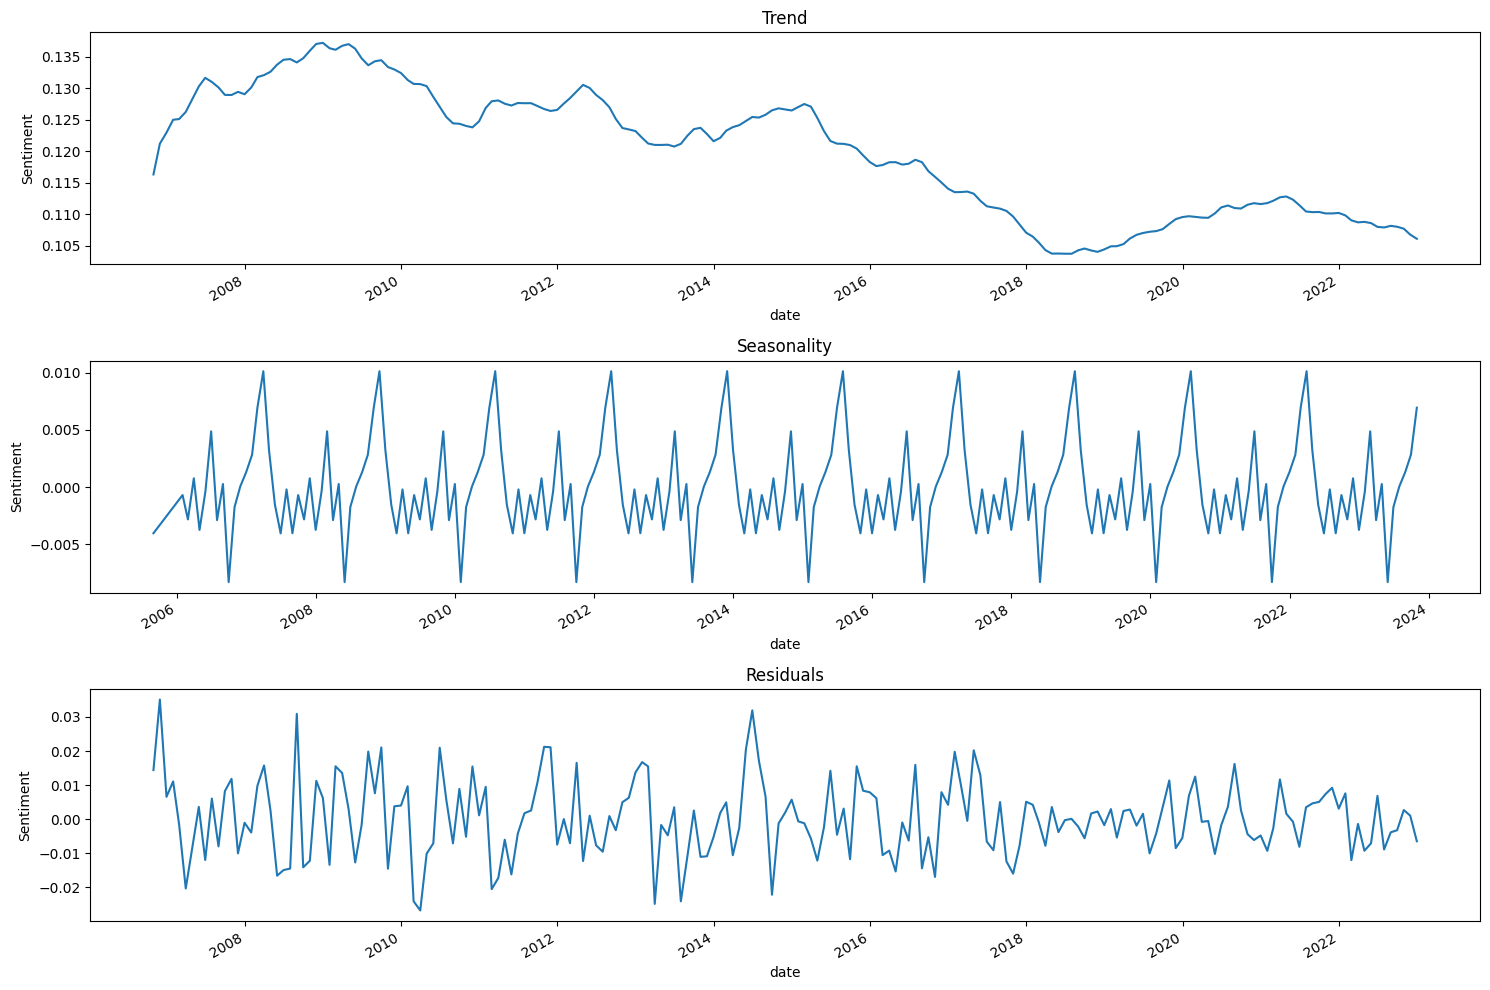

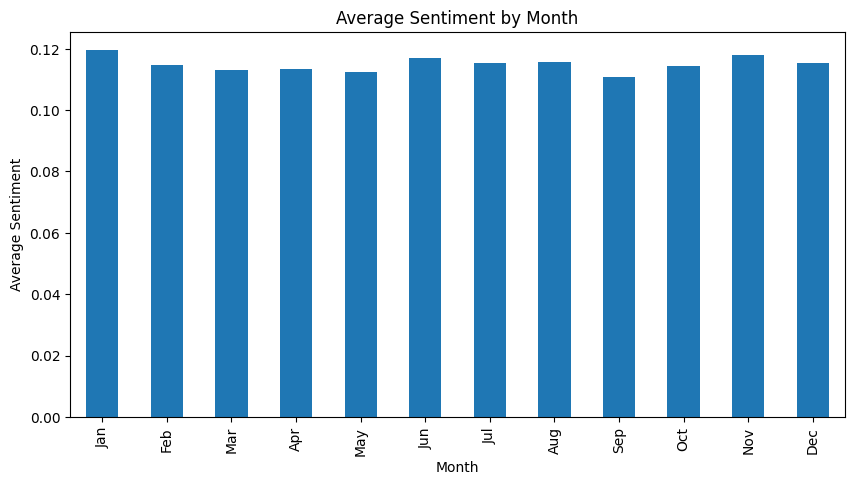

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Resampling the overall sentiment data monthly
overall_monthly_sentiment = df.resample('M', on='date')['polarity'].mean()

# Seasonal Decompose
decomposition = seasonal_decompose(overall_monthly_sentiment.dropna(), model='additive', period=20)

# Plotting the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10))

decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
ax1.set_ylabel('Sentiment')

decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
ax2.set_ylabel('Sentiment')

decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
ax3.set_ylabel('Sentiment')

plt.tight_layout()
plt.show()

# Preparing data for month-wise analysis
df['month'] = df['date'].dt.month
monthly_avg_sentiment = df.groupby('month')['polarity'].mean()

# Plotting month-wise average sentiment
plt.figure(figsize=(10, 5))
monthly_avg_sentiment.plot(kind='bar')
plt.title('Average Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


## Comparing Discussion of Men vs Women climbers.

In [2]:
df = pd.read_csv('data/forum/general-climbing-final.csv')

In [38]:
# for timing
from tqdm import tqdm
tqdm.pandas()

In [39]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer,pipeline
from pandarallel import pandarallel
import ast

model = AutoModelForSequenceClassification.from_pretrained('NLP-LTU/bertweet-large-sexism-detector')
tokenizer = AutoTokenizer.from_pretrained('NLP-LTU/bertweet-large-sexism-detector') 
classifier = pipeline("text-classification",model=model, tokenizer=tokenizer)
pandarallel.initialize(progress_bar=True, verbose=2)

INFO: Pandarallel will run on 14 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [7]:
def detect_sexism(body):
    try:
        prediction = classifier(body)[0]
    except Exception as e:
        print("Exception: ",e)
        prediction = None
    return prediction

# df.sexism = df.body.progress_apply(lambda x: detect_sexism(x))
df.body.iloc[:100].parallel_apply(detect_sexism)

KeyboardInterrupt: 

In [42]:
# sexism.fillna('', inplace=True)
df.sexism_label = df.sexism.apply(lambda x: ast.literal_eval(x)['label'] if not pd.isna(x) else None)
df.sexism_score = df.sexism.apply(lambda x: ast.literal_eval(x)['score'] if not pd.isna(x) else None)

In [58]:
# sexism.fillna('', inplace=True)
df.sexism_label = df.sexism.apply(lambda x: ast.literal_eval(x)['label'] if not pd.isna(x) else None)
df.sexism_score = df.sexism.apply(lambda x: ast.literal_eval(x)['score'] if not pd.isna(x) else None)

/tmp/ipykernel_128469/2166678854.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sexism.score = sexism.body.apply(lambda x: ast.literal_eval(x)['score'] if not pd.isna(x) else None)


In [83]:
sexism.label.value_counts()

body
not sexist    975
sexist          8
Name: count, dtype: int64

In [85]:
5*360/64

28.125

In [84]:
df.shape

(359999, 15)

In [81]:
df.loc[sexism[(sexism.label == 'sexist')]['Unnamed: 0'], 'body']

211234                           Pancake Butt Dumpster Slut
271960    Kole H    wrote:  and invite her on her first ...
5913      Tracy! Welcome home from your trip. Hope you h...
97083     Conservation AAC   or   Sustainable Summits   ...
78720     Randy W. wrote:This thread got me thinking.  m...
20758     Chris Plesko wrote:  That bitch is hard.That b...
57628     Tevis Blom wrote: a stick clip pussifies your ...
81907     camhead wrote:  hehe, obviously we have differ...
Name: body, dtype: object

In [ ]:
df.to_csv('data/general-climbing-final.csv', index=False)

In [17]:
df.sexism_label = df.sexism.apply(lambda x: x['label'] if x else None)
df.sexism_score = df.sexism.apply(lambda x: x['score'] if x else None)

0

In [28]:
# Filtering the dataset into two subsets: discussions about male and female climbers

male_climbers = [
    "Alex Honnold", "Chris Sharma", "Tommy Caldwell", "Adam Ondra",
    "Reinhold Messner", "Edmund Hillary", "Dean Potter", "David Lama",
    "Conrad Anker", "Ueli Steck"
]
female_climbers = [
    "Lynn Hill", "Ashima Shiraishi", "Sasha DiGiulian", "Margo Hayes",
    "Steph Davis", "Catherine Destivelle", "Janja Garnbret", "Angela Eiter",
    "Emily Harrington", "Beth Rodden"
]

# Keywords for identifying discussions about male and female climbers
male_keywords = ['male climber', 'men in climbing', 'man climber', 'men\'s climbing', 'male athlete' ] + male_climbers
female_keywords = ['female climber', 'women in climbing', 'woman climber', 'women\'s climbing', 'girl climber', 'female athlete'] + female_climbers

# Function to check if a post contains any of the keywords
def contains_keywords(text, keywords):
    return any(keyword in str(text).lower() for keyword in keywords)

# Splitting the dataset
df_male = df[df['body'].apply(lambda x: contains_keywords(x, male_keywords)) | 
                      df['title'].apply(lambda x: contains_keywords(x, male_keywords))]
df_female = df[(df['body'].apply(lambda x: contains_keywords(x, female_keywords)) |
                          df['title'].apply(lambda x: contains_keywords(x, female_keywords)))]

# Display the number of posts in each subset
len(df_male), len(df_female)


(1074, 918)

In [32]:
print(df_male.polarity.mean(), df_female.polarity.mean())
print(df_male.subjectivity.mean(), df_female.subjectivity.mean())

0.12235447150743921 0.12279169858931482
0.4657592910208399 0.46841995955194954


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text 
import numpy as np



# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d" % (topic_idx)] = " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topic_dict

# Number of topics
n_topics = 5

# Number of top words to display for each topic
n_top_words = 10

# Additional stop words
additional_stop_words = ['climb', 'women', 'man', 'female', 'climber', 'climbers', 'climbing', 'just', 'wrote', 'think', 'men', 'male', 'woman']

# Update the stop words list
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

# Male Discussions Topic Modeling
male_text = df_male['body'].values.tolist()
female_text = df_female['body'].values.tolist()

# CountVectorizer for text conversion into a matrix of token counts
count_vect_male = CountVectorizer(max_df=0.95, min_df=2, stop_words=list(stop_words))
count_vect_female = CountVectorizer(max_df=0.95, min_df=2, stop_words=list(stop_words))

# Fit and transform the text
male_tf = count_vect_male.fit_transform(male_text)
female_tf = count_vect_female.fit_transform(female_text)

# LDA for topic modeling
lda_male = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_female = LatentDirichletAllocation(n_components=n_topics, random_state=0)

# Fit the LDA model
lda_male.fit(male_tf)
lda_female.fit(female_tf)

# Display topics for male discussions
male_topics = display_topics(lda_male, count_vect_male.get_feature_names_out(), n_top_words)

# Display topics for female discussions
female_topics = display_topics(lda_female, count_vect_female.get_feature_names_out(), n_top_words)

male_topics, female_topics


({'Topic 0': 'like really know pants make said gym route weight don',
  'Topic 1': 'people don like time routes want new know years best',
  'Topic 2': 'like people time don good know sport ascent need ve',
  'Topic 3': 'don like people know want really way point gym time',
  'Topic 4': 'good girl like clinics type don shoes gym guys harness'},
 {'Topic 0': 'don like know people time routes route new ve gym',
  'Topic 1': 'gender don like people point really way article time ve',
  'Topic 2': 'people don time like want good really life need ll',
  'Topic 3': 'don like people want event guys know really gym group',
  'Topic 4': 'like people know good want way don ascent gear help'})

## Environmental impact

In [2]:
df = pd.read_csv('data/forum/general-climbing-final.csv')

In [3]:
# key_words for detecting forum posts about the environmental impact of climbing
key_words = ['environmental impact', 'environmental impact of climbing', 'environmental impact of rock climbing', 'environmental impact of bouldering', 'environmental impact of sport climbing', 'environmental impact of trad climbing', 'environmental impact of trad climbing', 'environmental impact of climbing gyms', 'environmental impact of climbing walls', 'environmental impact of climbing holds', 'environmental impact of chalk', 'environmental impact of climbing shoes', 'environmental impact of climbing gear', 'environmental impact of climbing equipment', 'environmental impact of climbing ropes', 'environmental impact of climbing harnesses', 'environmental impact of climbing cams', 'environmental impact of climbing nuts', 'environmental impact of climbing bolts', 'environmental impact of climbing anchors', 'environmental impact of climbing chalk', 'environmental impact of climbing shoes', 'environmental impact of climbing gear', 'environmental impact of climbing equipment', 'environmental impact of climbing ropes', 'environmental impact of climbing harnesses', 'environmental impact of climbing cams', 'environmental impact of climbing nuts', 'environmental impact of climbing bolts', 'environmental impact of climbing anchors', 'environmental impact of climbing chalk', 'environmental impact of climbing shoes', 'environmental impact of climbing gear', 'environmental impact of climbing equipment', 'environmental impact of climbing ropes', 'environmental impact of climbing harnesses', 'environmental impact of climbing cams', 'environmental impact of climbing nuts', 'environmental impact of climbing bolts', 'environmental impact of climbing anchors', 'environmental impact of climbing chalk', 'environmental impact of climbing shoes', 'environmental impact of climbing gear', 'environmental impact of climbing equipment', 'environmental impact of climbing ropes', 'environmental impact of climbing harnesses', 'environmental impact of climbing cams', 'environmental impact of climbing nuts', 'environmental impact of climbing bolts', 'environmental impact of climbing anchors', 'environmental impact of climbing chalk', 'environmental impact of climbing shoes', 'environmental impact of climbing gear', 'environmental impact of climbing equipment', 'environmental impact of climbing ropes', 'environmental impact of climbing harnesses', 'environmental impact of climbing cams', 'environmental impact of climbing nuts', 'environmental impact of climbing bolts', 'environmental impact of climbing anchors', 'environmental impact of climbing chalk']
key_words.extend(['leave no trace', 'route cleaning', 'gardening', 'litter', 'left a trace', 'ethics of trundling', 'trundling'])
df_enviro = df[df.body.str.contains('|'.join(key_words), case=False) | df.title.str.contains('|'.join(key_words), case=False)]
df_enviro.date = pd.to_datetime(df_enviro.date)


In [59]:
df_enviro.shape

(2917, 15)

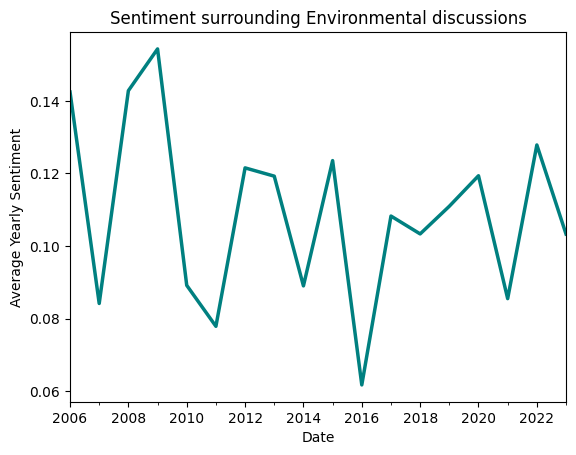

In [19]:
monthly_sentiment = df_enviro.resample('Y', on='date')['polarity'].mean()
monthly_sentiment.plot(color='teal', linewidth=2.5)
plt.title('Sentiment surrounding Environmental discussions')
plt.plot(monthly_sentiment.index, monthly_sentiment, alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Average Yearly Sentiment')
plt.show()


/tmp/ipykernel_205575/1993974868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['date'] = pd.to_datetime(df_subset['date'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


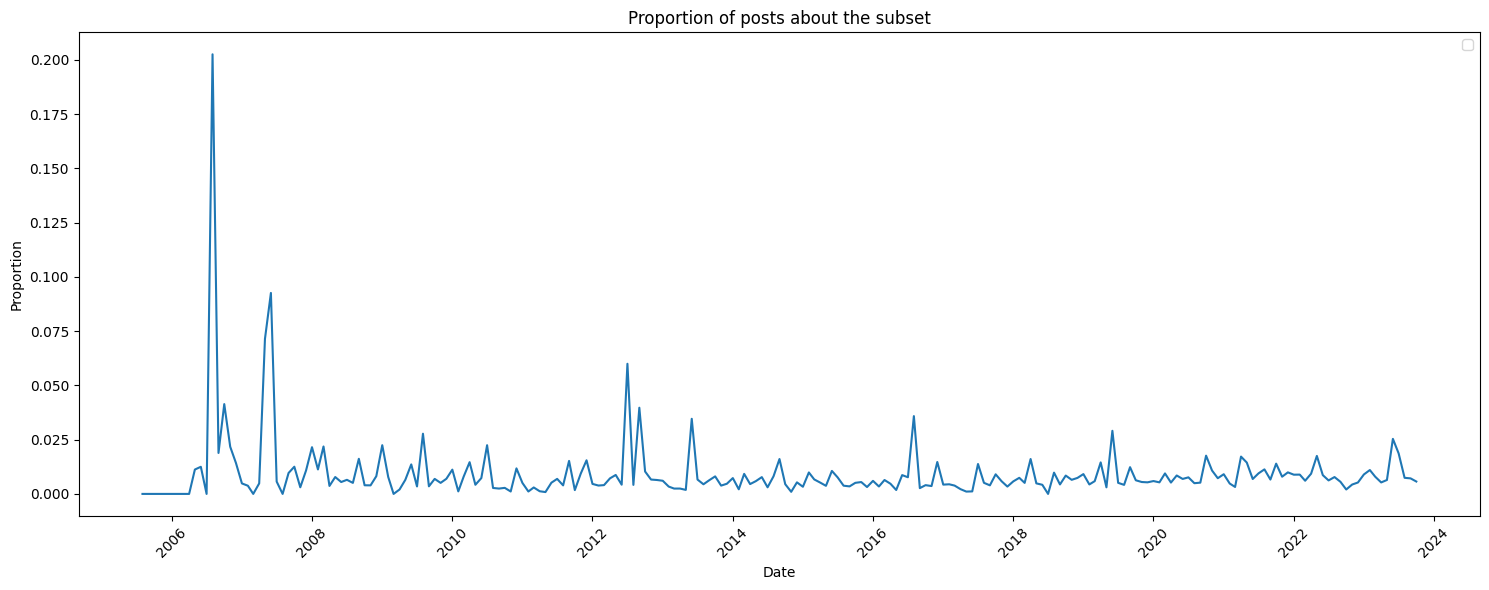

In [9]:
def proportion_of_posts(df, df_subset, title='Proportion of posts about the subset'):
    # df needs to have a date column
    # df_subset needs to have a date column
    df['date'] = pd.to_datetime(df['date'])
    df_subset['date'] = pd.to_datetime(df_subset['date'])

    # Group by year and month, and count the number of posts
    monthly_posts = df.groupby([df['date'].dt.year, df['date'].dt.month]).size()
    # Create a new DataFrame for plotting
    monthly_posts_df = monthly_posts.rename_axis(['Year', 'Month']).reset_index(name='Posts')
    # Create a datetime index for plotting
    monthly_posts_df['DateTime'] = pd.to_datetime(monthly_posts_df[['Year', 'Month']].assign(DAY=1))

    # Group by year and month, and count the number of 'chip' posts
    monthly_chip_posts = df_subset.groupby([df_subset['date'].dt.year, df_subset['date'].dt.month]).size()

    # Create a DataFrame for 'chip' posts
    monthly_chip_posts_df = monthly_chip_posts.rename_axis(['Year', 'Month']).reset_index(name='ChipPosts')

    # Create a datetime index for plotting
    monthly_chip_posts_df['DateTime'] = pd.to_datetime(monthly_chip_posts_df[['Year', 'Month']].assign(DAY=1))

    # Merge with the total posts DataFrame
    merged_df = pd.merge(monthly_posts_df, monthly_chip_posts_df, on='DateTime', how='left').fillna(0)

    # Calculate the proportion of 'chip' posts
    merged_df['ChipPostProportion'] = merged_df['ChipPosts'] / merged_df['Posts']

    # Plotting
    plt.figure(figsize=(15, 6))

    # Plot total posts
    # sns.lineplot(x='DateTime', y='Posts', data=merged_df, label='Total Posts')

    # Plot proportion of 'chip' posts
    sns.lineplot(x='DateTime', y='ChipPostProportion', data=merged_df)

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Show plot
    plt.show()

proportion_of_posts(df, df_enviro)

Text(0, 0.5, 'Proportion of Posts')

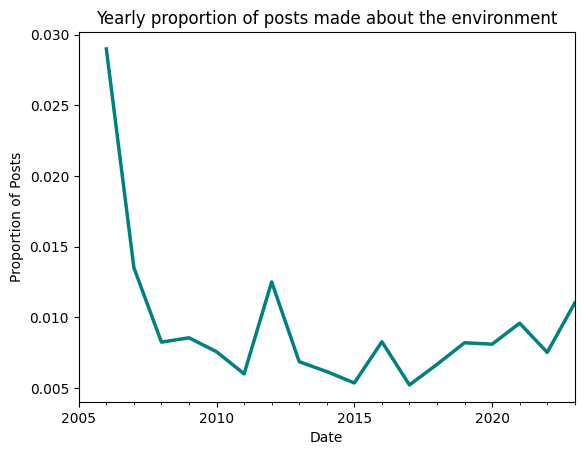

In [18]:
plt.style.use('default')
(df_enviro.resample('Y', on='date').size()/df.resample('Y', on='date').size()).plot(color='teal', linewidth=2.5)
plt.title('Yearly proportion of posts made about the environment')
plt.xlabel('Date')
plt.ylabel('Proportion of Posts')

# Getting Ratings (difficulty), Stars, and Ticks

## Getting Classic Routes at Red River Gorge

In [30]:
df = pd.read_csv('data/routes-red-river-gorge.csv', index=False)
# cleaning
df.route_grade = df.route_grade.str.split(' ').str[0]
df.num_ratings = df.num_ratings.str.replace(',', '').astype(int)
df.height = df.height.str.split(' ').str[0].astype(int)
df.num_pitches = df.num_pitches.str.split(' ').str[0].astype(int)
df.page_views_total = df.page_views_total.str.replace(',', '').astype(int)
# --- add difficulty as a category ---
beginners = ['6', '7', '8', '9']
intermediate = ['10', '11']
advanced = ['12', '13', '14', '15']
# make a new column that is beginner if the grade contains beginners, and so on
df['difficulty'] = np.select(
    [
        df.route_grade.str.contains('|'.join(beginners)),
        df.route_grade.str.contains('|'.join(intermediate)),
        df.route_grade.str.contains('|'.join(advanced))
    ],
    ['beginner', 'intermediate', 'advanced'],
    default='other'
)
# ---
# FIX NANs
df.fillna('', inplace=True)


In [5]:
df_routes = pd.read_csv('data/routes-red-river-gorge-clean.csv')